In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import Normalizer

In [2]:
import torch
import torch.nn as nn
import torch.nn.functional as F
import torch.optim as optim
from torch.utils.data import DataLoader
from torch.utils.data import Dataset

In [3]:
df = pd.read_csv("/content/mnist_train.csv")
Y = df['label']
X = df.drop('label',axis= 1)

In [4]:
df

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [5]:
X.sample(10).iloc[:,200:]

,8x5,8x6,8x7,8x8,8x9,8x10,8x11,8x12,8x13,8x14,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
35529,0,0,0,0,0,0,0,0,233,253,...,0,0,0,0,0,0,0,0,0,0
24308,0,0,0,0,0,0,0,23,177,254,...,0,0,0,0,0,0,0,0,0,0
864,0,0,0,0,0,0,0,13,128,242,...,0,0,0,0,0,0,0,0,0,0
37771,0,0,0,0,0,0,0,0,0,65,...,0,0,0,0,0,0,0,0,0,0
43095,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
30430,0,0,0,0,0,0,0,0,91,254,...,0,0,0,0,0,0,0,0,0,0
59854,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
16361,0,0,0,0,0,229,254,254,240,29,...,0,0,0,0,0,0,0,0,0,0
8022,0,0,0,0,0,45,178,253,254,234,...,0,0,0,0,0,0,0,0,0,0
38549,0,0,0,9,192,252,252,252,252,253,...,0,0,0,0,0,0,0,0,0,0


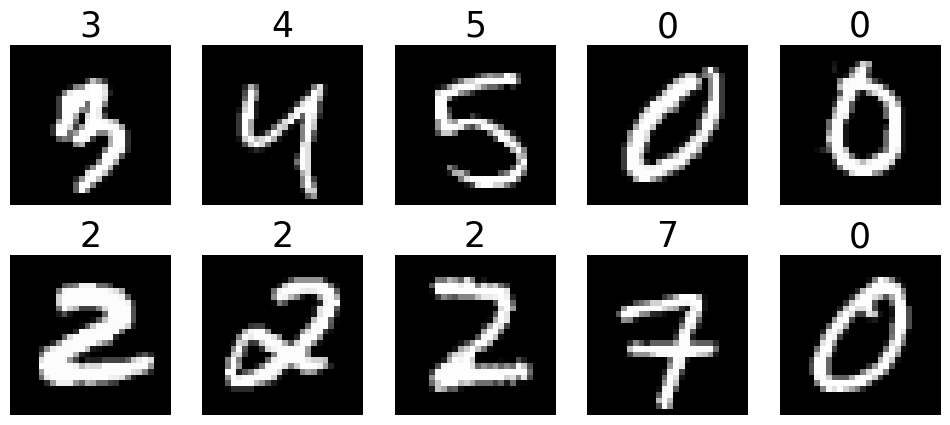

In [6]:
fig, axes = plt.subplots(2,5, figsize=(12,5))
axes = axes.flatten()
idx = np.random.randint(0,X.shape[0],size=10)
for i in range(10):
    axes[i].imshow(X.iloc[idx[i],:].values.reshape(28,28), cmap='gray')
    axes[i].axis('off') # hide the axes ticks
    axes[i].set_title(str(int(Y[idx[i]])), color= 'black', fontsize=25)
plt.show()

In [7]:
# Test-Train-Val Dataset Spliting.

x_t,x_test,y_t,y_test = train_test_split(X,Y,test_size = 0.2,random_state = 42)
x_train,x_val,y_train,y_val = train_test_split(x_t,y_t,test_size=0.2,random_state=42)

In [8]:
x_train = x_train.fillna(0)
x_val = x_val.fillna(0)
x_test = x_test.fillna(0)

# Normalizing the Dataset.

normalizer = Normalizer()
x_train = normalizer.fit_transform(x_train)
x_val = normalizer.transform(x_val)
x_test = normalizer.transform(x_test)

In [9]:
lst = list(range(1,11))

In [10]:
lst[0]

1

In [11]:
class CustomDataset(Dataset):

  def __init__(self,features,label):
    self.features = features
    self.label = label

  def __len__(self):
    return self.features.shape[0]

  def __getitem__(self,idx):

    sample = self.features[idx]
    label = self.label.values[idx]
    sample_tensor = torch.tensor(sample,dtype = torch.float32)
    label_tensor = torch.tensor(label,dtype = torch.long)

    return sample_tensor,label_tensor

In [12]:
train_dataset = CustomDataset(x_train,y_train)
val_dataset = CustomDataset(x_val,y_val)
test_dataset = CustomDataset(x_test,y_test)

In [13]:
batch_size = 64
device = ("cuda" if torch.cuda.is_available() else "cpu")

In [14]:
print(device)

cuda


In [15]:
train_dataloader = DataLoader(train_dataset,batch_size=batch_size,shuffle=True)
val_dataloader = DataLoader(val_dataset,batch_size = batch_size,shuffle=True)
test_dataloader = DataLoader(test_dataset,batch_size=batch_size,shuffle=True)

In [16]:
data,label = next(iter(train_dataloader))
print(data[:,278:300])
print(label)          # (batch_size, feature)

tensor([[0.0000, 0.0000, 0.0000,  ..., 0.0911, 0.1020, 0.1020],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0763],
        [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
        ...,
        [0.0000, 0.0000, 0.0000,  ..., 0.0966, 0.0966, 0.0164],
        [0.0000, 0.0000, 0.0000,  ..., 0.0996, 0.0996, 0.0000],
        [0.0000, 0.0000, 0.0000,  ..., 0.0031, 0.0000, 0.0000]])
tensor([3, 7, 3, 5, 5, 3, 5, 8, 5, 1, 7, 2, 7, 7, 7, 8, 2, 8, 0, 3, 7, 4, 0, 3,
        4, 6, 6, 4, 9, 6, 6, 5, 5, 8, 4, 7, 5, 5, 2, 6, 1, 9, 7, 5, 9, 2, 3, 4,
        7, 0, 4, 3, 4, 9, 8, 7, 8, 3, 7, 9, 6, 9, 0, 1])


In [17]:
class Model1(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(28*28, 512)
        self.relu1 = nn.ReLU()
        self.fc2 = nn.Linear(512, 512)
        self.relu2 = nn.ReLU()
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = self.relu1(self.fc1(x))
        x = self.relu2(self.fc2(x))
        x = self.fc3(x)
        return x

## Using Functional Interface
```
1. It's a functional interface where we directly pass the input tensor to it and get the activated output.
2. It does not hold or manage any internal state and therefore stateless.
3. Since it's stateless, it's ideal when you don't need the module to track activations as part of the model's stateful components.

```

In [18]:
class FunctionalModel(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(784, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 10)

    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x

## Using nn.Sequential

```
1. This approach represent Model as a sequence of Operations.
2. It the most concise way to define a model, but it offers less flexibility for models that require complex data flows or custom operations.
3. "nn.Sequential" expects modules as its arguments.
```

In [19]:
class SeqModel(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer = nn.Sequential(
                            nn.Linear(784, 512),
                            nn.ReLU(),
                            nn.Linear(512, 512),
                            nn.ReLU(),
                            nn.Linear(512, 10))

  def forward(self,x):
    return self.layer(x)

## Using Batch Normalization and Dropout Layers

In [20]:
class Model(nn.Module):

  def __init__(self):
    super().__init__()
    self.fc1 = nn.Linear(784,512)
    self.batch_norm1 = nn.BatchNorm1d(512)
    self.relu1 = nn.ReLU()
    self.dropout_1 = nn.Dropout(p = 0.2)
    self.fc2 = nn.Linear(512,512)
    self.batch_norm2 = nn.BatchNorm1d(512)
    self.relu2 = nn.ReLU()
    self.dropout_2 = nn.Dropout(p = 0.2)
    self.fc3 = nn.Linear(512,10)

  def forward(self,x):
    x = self.dropout_1(self.relu1(self.batch_norm1(self.fc1(x))))
    x = self.dropout_2(self.relu2(self.batch_norm2(self.fc2(x))))
    x = self.fc3(x)
    return x

In [21]:
model = Model().to(device)

In [22]:
loss_func = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters() , lr = 0.001)
epochs = 100
best_loss = 1e9
patience = 5

In [23]:
a = torch.tensor(5)

In [24]:
a.item()


5

In [25]:
for epoch in range(epochs):

  # Training
  model.train()
  train_loss = 0
  train_count = 0
  train_pred = 0
  for data,label in train_dataloader:
    data,label = data.to(device),label.to(device)
    pred = model(data)
    loss = loss_func(pred,label)
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()
    train_loss += loss.item()
    train_pred += (pred.argmax(1) == label).sum().type(torch.float).item()
    train_count += 1

  train_loss = train_loss / train_count


  # Validation
  with torch.no_grad():
    model.eval()
    val_loss = 0
    val_count = 0
    val_pred = 0
    for data,label in val_dataloader:
      data,label = data.to(device),label.to(device)
      pred = model(data)
      loss = loss_func(pred,label)
      val_pred += (pred.argmax(1) == label).sum().type(torch.float).item()
      val_count += len(label)
      val_loss += loss.item()

    val_loss = val_loss / val_count


    if val_loss < best_loss:
        count = 0
        best_loss = val_loss
        checkpoint = {
            'epoch': epoch + 1,
            'model_state_dict': model.state_dict(),
            'optimizer_state_dict': optimizer.state_dict(),
            'loss': best_loss,
        }
        torch.save(checkpoint, f"Model checkpoint: {epoch+1}")
    else:
        count += 1
    if count == patience:
        print("Early Stopping !!!")
        break

    if epoch%10 == 0:
      print(f"{epoch+1}: train_loss = {train_loss:.7f} | val_loss = {val_loss:.7f} " )

1: train_loss = 0.2333696 | val_loss = 0.0016576 
11: train_loss = 0.0270763 | val_loss = 0.0012035 
Early Stopping !!!


## Model Testing

In [27]:
# Load the saved model checkpoint
# checkpoint_path = 'path_to_your_saved_checkpoint.pth'
# checkpoint = torch.load(checkpoint_path)

# Assuming model and optimizer are defined elsewhere in your code
# model.load_state_dict(checkpoint['model_state_dict'])

# Put model in evaluation mode
model.eval()

# Load your test dataset
# Assuming test_dataloader is defined elsewhere in your code and loaded with test data
test_dataloader = test_dataloader

# Initialize variables to monitor test performance
test_loss = 0
correct = 0

# No gradient updates needed for testing
with torch.no_grad():
    for data, label in test_dataloader:
        data, label = data.to(device), label.to(device)
        pred = model(data)
        loss = loss_func(pred, label)
        test_loss += loss.item()
        correct += (pred.argmax(1) == label).sum().item()

# Calculate average loss and accuracy over the test set
test_loss /= len(test_dataloader.dataset)
test_accuracy = 100. * correct / len(test_dataloader.dataset)

print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

Test Loss: 0.0011, Test Accuracy: 98.07%
